In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing our dataset from csv file
dataset=pd.read_csv("titanic-passengers.csv", sep=";")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
#Checking the dtypes of all the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
#découvrir les missing valeus
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#detail de missing value

total = dataset.isnull().sum().sort_values(ascending=False)
percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [7]:
n_elements = len(dataset['Cabin'])
print("Nombres d'éléments", n_elements)

#nombre d'elements categorie
print(dataset['Cabin'].value_counts())


Nombres d'éléments 891
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64


In [8]:
n_elements1 = len(dataset['Embarked'])
print("Nombres d'éléments", n_elements1)

#nombre d'elements categorie
print(dataset['Embarked'].value_counts())


Nombres d'éléments 891
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data['Embarked']=new_data.Embarked.fillna('S')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [31]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [11]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [23]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7988826815642458


In [24]:
x_train.shape, x_test.shape


((712, 7), (179, 7))

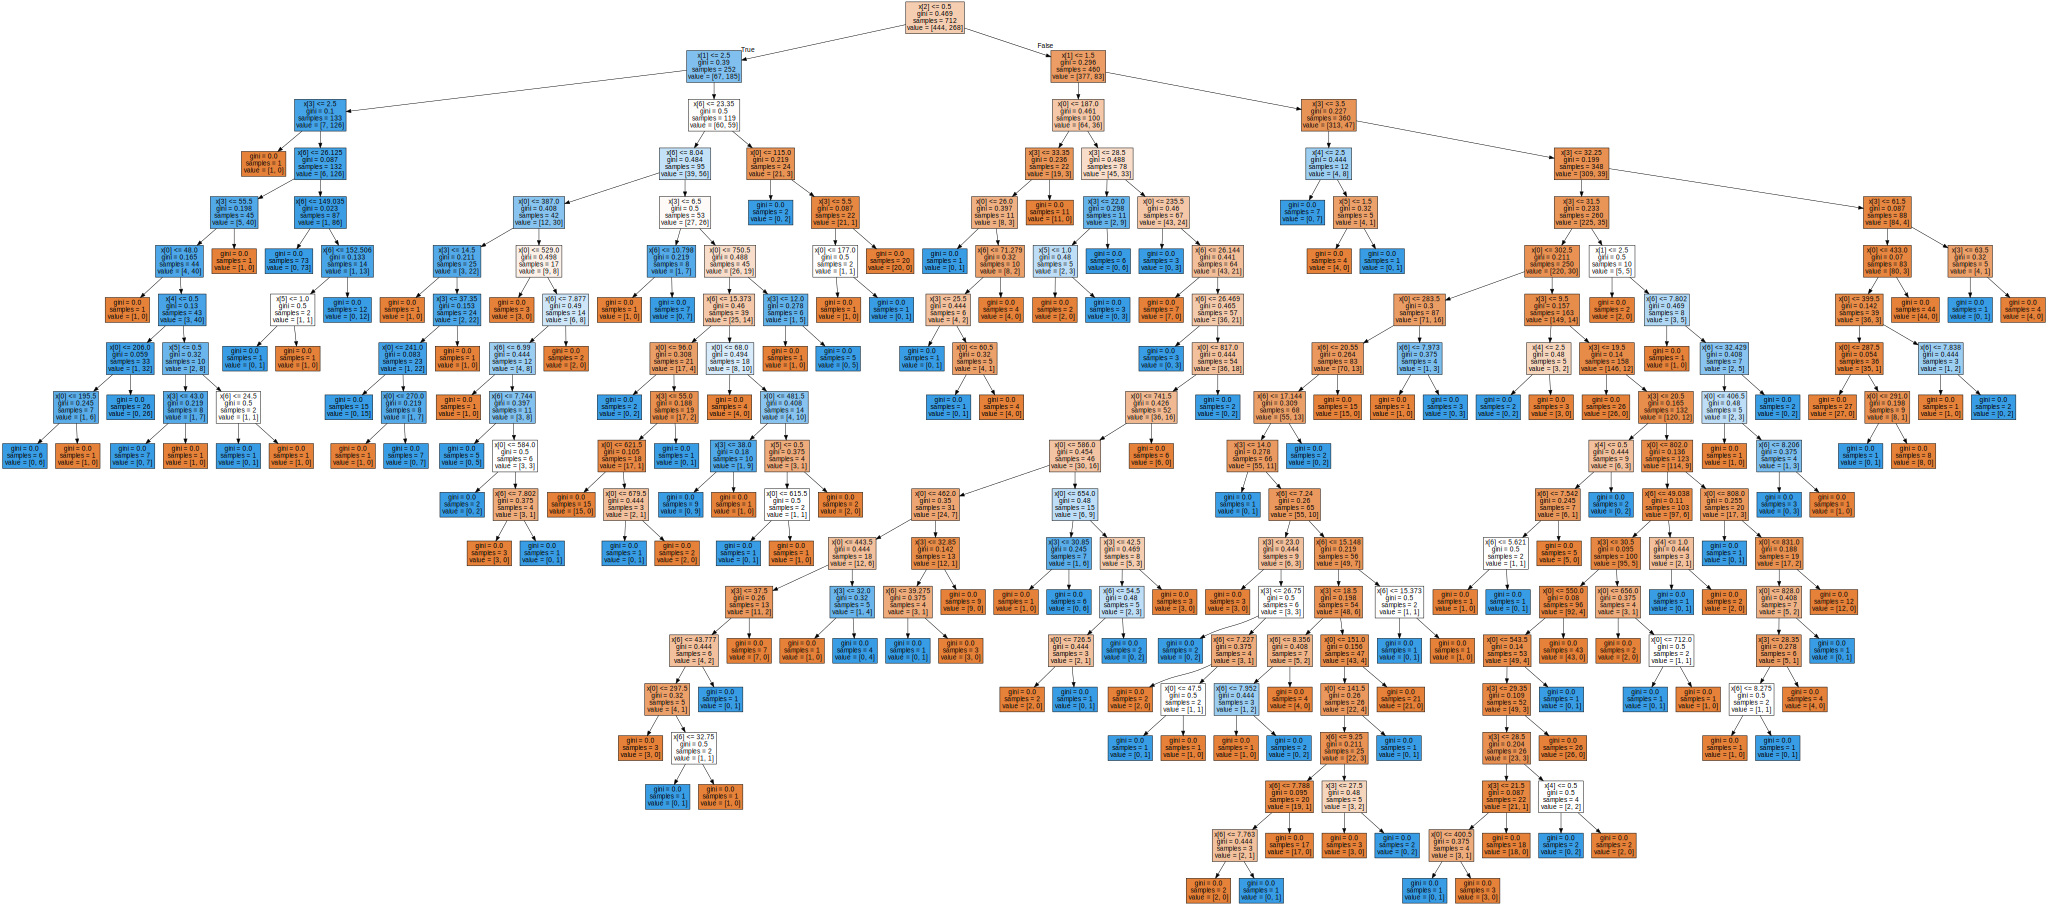

In [25]:
# plotting tree 
from sklearn.tree import export_graphviz
import graphviz
dot_data= export_graphviz(tree, out_file=None,filled = True)
graph = graphviz.Source(dot_data)
graph.render("data")
graph


In [15]:
 # visualization
export_graphviz(
        tree,
        out_file="tree.dot",
        feature_names = tree.feature_names_in_,
        class_names=["0", "1", "2", "3"],
        rounded=True,
        filled=True
    )
graph = graphviz.Source(dot_data)
#graph.render("data")

graph.render('tree', format='jpg',view=True)
graph.view()

'tree.pdf'

<Axes: xlabel='Predicted', ylabel='Actual'>

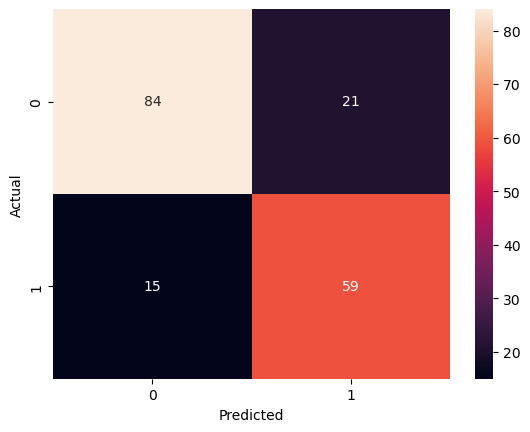

In [26]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [44]:
dtree = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [29]:
Rforest = data.copy()
Rforest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [38]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

x1=Rforest.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y1= Rforest["Survived"]
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.3) #splitting data with test size of 30%
#random_forest = RandomForestClassifier(n_estimators=15)
# Random Forest
rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)


rf.fit(x1_train, y1_train)

y1_prediction = random_forest.predict(x1_test)

random_forest.score(x1_train, y1_train)
#acc_random_forest = round(random_forest.score(x1_train, y1_train) * 100, 2)

print("Accuracy:", metrics.accuracy_score(y1_test, y1_prediction))  #Measuring the accuracy of our model


C:\Users\publi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.8432835820895522


In [42]:
 # visualization
export_graphviz(
        random_forest,
        out_file="random_forest.dot",
        feature_names = random_forest.feature_names_in_,
        class_names=["0", "1", "2", "3"],
        rounded=True,
        filled=True
    )
graph = graphviz.Source(dot1_data)
#graph.render("data")

graph.render('random_forest', format='jpg',view=True)
graph.view()

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'